<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

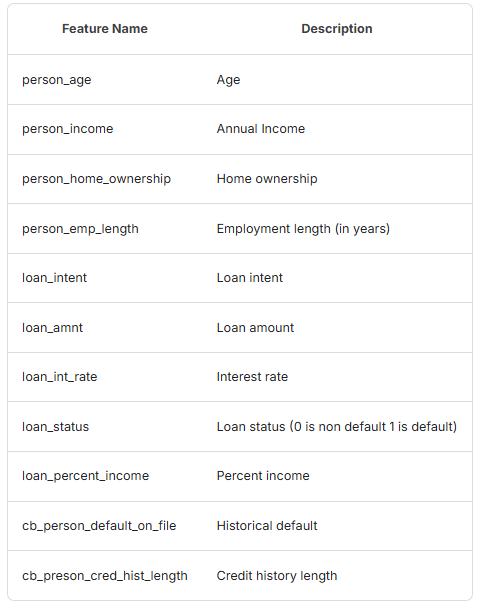

In [6]:
#pip install seaborn

______________________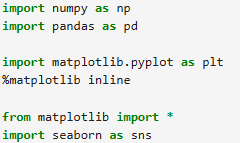

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "D:\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
    self.io

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________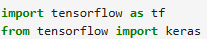

In [ ]:
import tensorflow as tf
from tensorflow import keras

___________________

In [ ]:
print(tf.__version__)

______________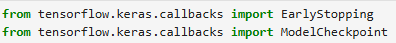

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

__________________

In [ ]:
np.random.seed(42)

_____________________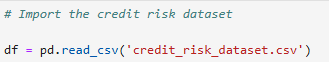

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')

____________________

In [ ]:
df.head()

__________________________

In [ ]:
df.info()

<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________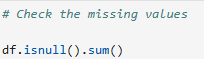

In [ ]:
df.isnull().sum()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [ ]:
df.isnull().sum()

In [ ]:
# It doesn't have any NaN(s)

____________________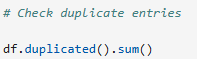

In [ ]:
df.duplicated().sum()

_________________________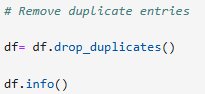

In [ ]:
df = df.drop_duplicates()

df.info()

_______________________________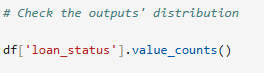

In [ ]:
df['loan_status'].value_counts()

__________________________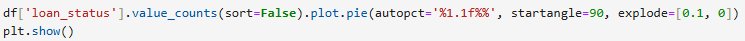

In [ ]:
df['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1,0])

In [ ]:
# The dataset is unbalanced

_____________________________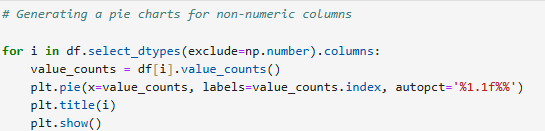

In [ ]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(x=value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

_____________________________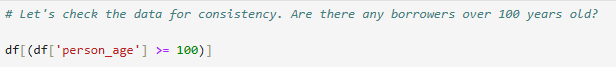

In [ ]:
df[(df['person_age'] >= 100)]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [ ]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

In [ ]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

In [ ]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [ ]:
# Renters often default on loans, homeowners rarely do

______________________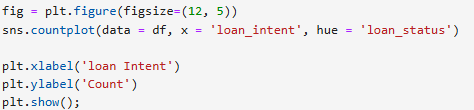

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data=df, x='loan_intent', hue='loan_status')

plt.xlabel('loan Intent')
plt.ylabel('count')
plt.show()

In [ ]:
# Medical loans and Debt-Consolidation loans are more risky

________________________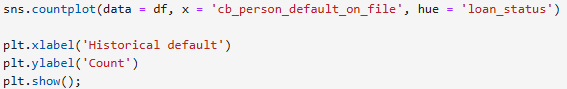

In [ ]:
sns.countplot(data=df, x='cb_person_default_on_file', hue='loan_status')

plt.xlabel('historical default')
plt.ylabel('count')
plt.show()

In [ ]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

______________________

In [ ]:
df.head(3)

_________________________

In [ ]:
df.info()

<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________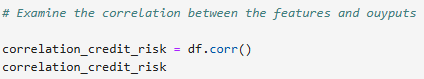

In [ ]:
correlation_credit_risk = df.corr()
correlation_credit_risk

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [ ]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

In [ ]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

In [ ]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________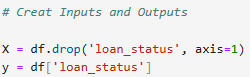

In [ ]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

___________________________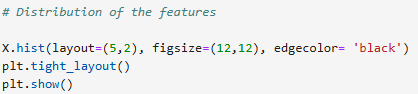

In [ ]:
x.hist(layout=(5,2), figsize=(12,12), edgecolor='black')
plt.tight_layout()
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [ ]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# changing the distribution of values so that the mean of the observed values is -0- 
# and the standard deviation is 1.

scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

___________________________

In [ ]:
X_train_imb.shape

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____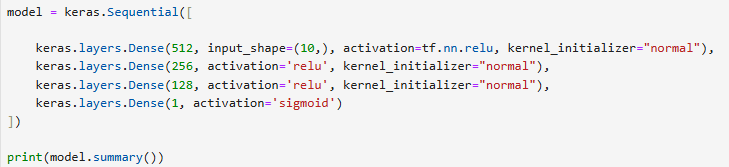

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(10,), activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.Dense(256, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(1, activation='sigmoid'),
])

print(model.summary())

____________________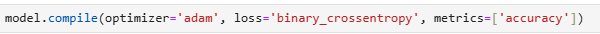

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

__________________________

In [ ]:
mc = ModelCheckpoint('bets_model_MLP.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

___________________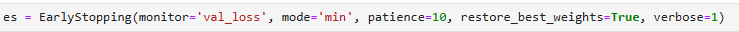

In [ ]:
es = EarlyStopping(monitor='val-loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________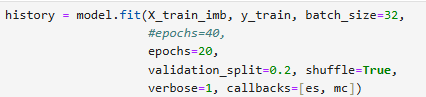

In [ ]:
history=model.fit(X_train_imb, y_train, batch_size=32, epochs=20, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es,mc])

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________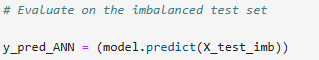

In [8]:
y_pred_ANN = (model.predict(X_test_imb))

NameError: name 'model' is not defined

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [ ]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

In [ ]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________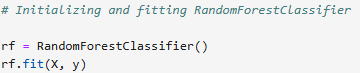

In [ ]:
rf = RandomForestClassifier()
rf.fit(x, y)

_______________________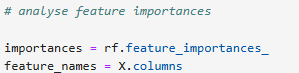

In [ ]:
importances = rf.feature_importances_
fetaure_names = x.columns

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [ ]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [ ]:
# Print feature ranking

print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, fetaure_names[indices[f]], importances[indices[f]]))

In [ ]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), fetaure_names[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

______________________

In [ ]:
y_pred_random = new_random.predict(X_test_imb)

__________________________

In [ ]:
print(classification_report(y_test, y_pred_random))

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [ ]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [ ]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

In [ ]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

______________________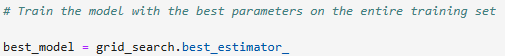

In [ ]:
best_model = grid_search.best_estimator_

_________________________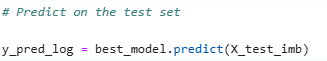

In [ ]:
y_pred_log = best_model.predict(X_test_imb)

_________________________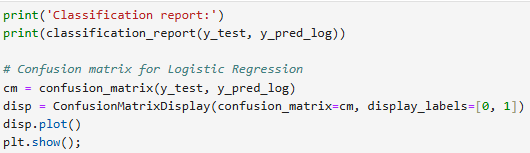

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [ ]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [ ]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________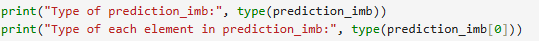

In [ ]:
print('Type of prediction_imb: ', type(prediction_imb))
print('Type of each element in prediction_imb: ', type(prediction_imb[0]))

_________________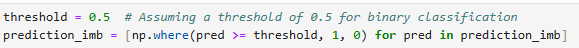

In [ ]:
threshold = 0.5
prediction_imb = [np.where(pred >= threshold, 1, 0) for pred in prediction_imb]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [ ]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [ ]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

In [ ]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

In [3]:
x_train_lstm = X_train_imb.values.reshape(X_train_imb.shape[0], 1, X_train_imb.shape[1])
x_test_lstm = X_test_imb.values.reshape(X_test-imb.shape[0], 1, X_test-imb.shape[1])

NameError: name 'X_train_imb' is not defined

In [83]:
LSTM_model = keras.Sequential([
    keras.layers.LSTM(100, activation = 'relu', input_shape=(10,)),
    keras.layers.Dense(2)
])
print(model.summary())

D:\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 10)

In [ ]:
# create the tensor to add as input shape 
# create model
# add to last graph